In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import pickle
from sklearn import tree
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
#this function load the RGB image and change to gray inage, change the 2D image data to 1D and form a matrix
def load_image_to_vector(image_path,image_number):
    img_data=[]
    for i in range (image_number):
        img_color= mpimg.imread(image_path + str(i) + '.png')
        img=cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
        img=cv2.resize(img,(200,200))
        img_vector=img.reshape(40000)
        img_data.append(img_vector)
    return img_data

In [3]:
def get_label(label_path,label_name):
    label=pd.read_table(label_path)
    y=label[label_name]
    return y

In [4]:
def DecisionTree_model(x_train,y_train,x_test,y_test):
    #tree_params={'criterion':'entropy'}
    clf = tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=7 )
    clf.fit(x_train,y_train)
    y_pred =  clf.predict(x_test)
    print('Accuracy on train set:'+str(clf.score(x_train,y_train)))
    print('Accuracy on test set: '+str(accuracy_score(y_test,y_pred)))
    print(classification_report(y_test,y_pred))
    return clf

Accuracy on train set:1.0
Accuracy on test set: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00       103
           4       1.00      1.00      1.00       106

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

CPU times: total: 33 s
Wall time: 30.8 s


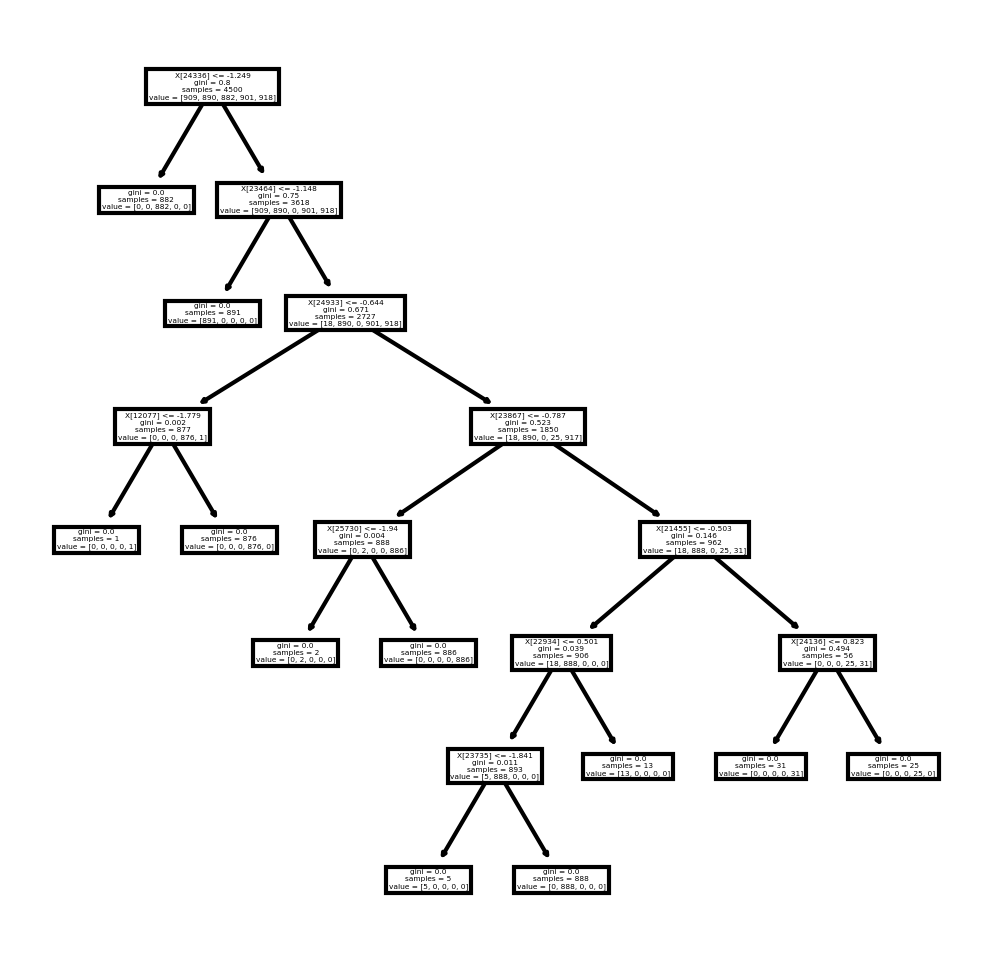

In [5]:
%%time
#get image data
img_data=load_image_to_vector('../datasets/cartoon_set/img/',5000)
#img_data_test=load_image_to_vector('../datasets/celeba_test/img/',1000)
#get label
label=get_label('../datasets/cartoon_set/labels.csv','face_shape')
label=label[0:5000]
#y_test=get_label('../datasets/celeba_test/labels.csv','gender')
#Standardize the data
x_train, x_test, y_train, y_test = train_test_split(img_data, label,test_size=0.1,random_state=0)
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)
#train the model and report accuracy
model=DecisionTree_model(x_train,y_train,x_test,y_test)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model)
#save model
pickle.dump(model,open("DecisionTree_shape.dat","wb")) 

In [6]:
%%time
#get image data
img_data_test=load_image_to_vector('../datasets/cartoon_set_test/img/',2500)
img_data_test= StandardScaler().fit_transform(img_data_test)
#get label
label_test=get_label('../datasets/cartoon_set_test/labels.csv','face_shape')
#load model
loaded_model = pickle.load(open("DecisionTree_shape.dat","rb"))

label_pred=loaded_model.predict(img_data_test)
print('Accuracy on test set: '+str(accuracy_score(label_test,label_pred)))
print(classification_report(label_test,label_pred))

Accuracy on test set: 0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       500
           3       1.00      1.00      1.00       500
           4       1.00      1.00      1.00       500

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500

CPU times: total: 10.9 s
Wall time: 9.49 s


In [7]:
fig.savefig('treestructure.png')